In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from cosmological_weight import CosmologicalWeight
import matplotlib.pyplot as plt
plt.style.use("plots/mesa.mplstyle")

In [2]:
# compute gravitational-wave energy spectrum of BBHs with different masses and spins=0
df = pd.DataFrame()
df['m1'] = [5.,10.,20.,40.,50.,60.,70.]
df['m2'] = df['m1']
df['spin1'] = np.zeros(7)
df['spin2'] = df['spin1']

In [3]:
class_variables = ['m_BH1', 'm_BH2','spin_BH1','spin_BH2']
pop = CosmologicalWeight(df, columns=df.columns.tolist(), class_variables=class_variables)

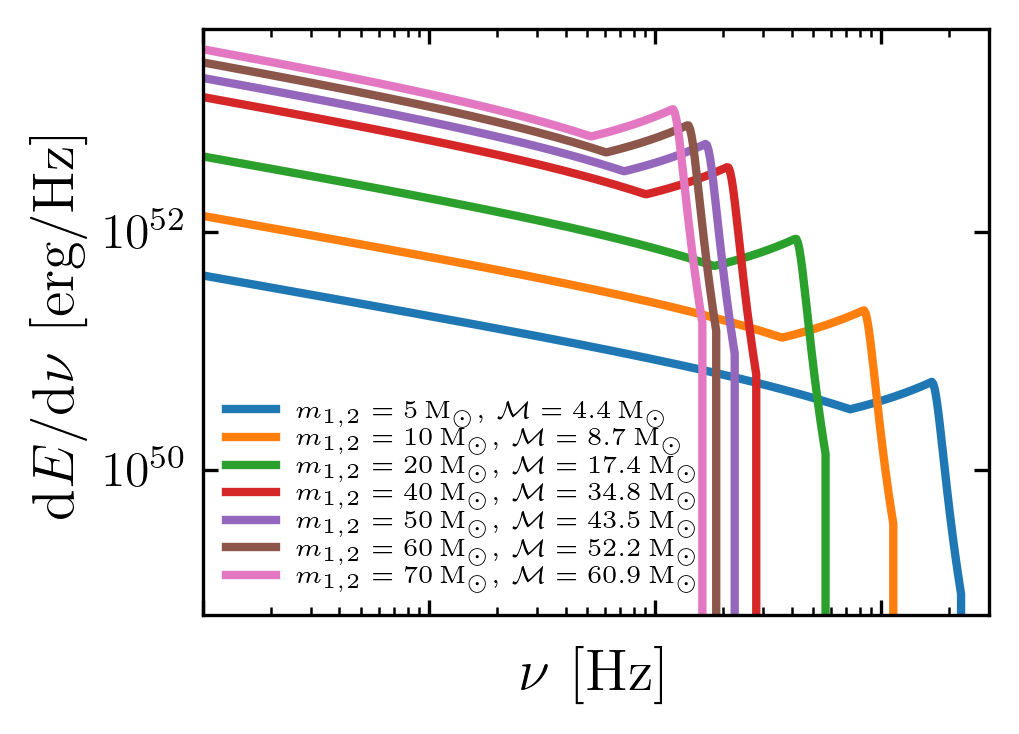

In [4]:
plt.figure()
f = np.logspace(0.,3.4, 500)
for i in range(df.shape[0]):
    dEdv = pop.GW_energy_spectrum(f, [i], waveforms='Ajith+11')
    plt.plot(f, dEdv, linewidth=2, label=r'$m_\mathrm{1,2}=%2.0f\,\mathrm{M}_\odot,\, \mathcal{M}=%2.1f\,\mathrm{M}_\odot$'%(pop.getData('m_BH1',i),pop.getData('Mchirp',i)))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,3000)
plt.ylim(0.6e49,5e53)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc=3,fontsize=6,labelspacing=.05)
plt.tick_params(labelbottom=False)
plt.xlabel(r'$\nu$ [Hz]',fontsize=14)
plt.ylabel(r'$\mathrm{d}E/\mathrm{d}\nu$ [erg/Hz]',fontsize=14)
plt.savefig('./plots/arXiv_2109.05836_GW_energy_spectrum_1.pdf',dpi=300,bbox_inches='tight')

In [5]:
# compute gravitational-wave energy spectrum of BBH with m1=m2=10Msun and different spins
df = pd.DataFrame()
df['m1'] = np.ones(5)*10.
df['m2'] = df['m1']
df['spin1'] = [-0.9,-0.5,0.,0.5,0.9]
df['spin2'] = df['spin1']

In [6]:
class_variables = ['m_BH1', 'm_BH2','spin_BH1','spin_BH2']
pop = CosmologicalWeight(df, columns=df.columns.tolist(), class_variables=class_variables)

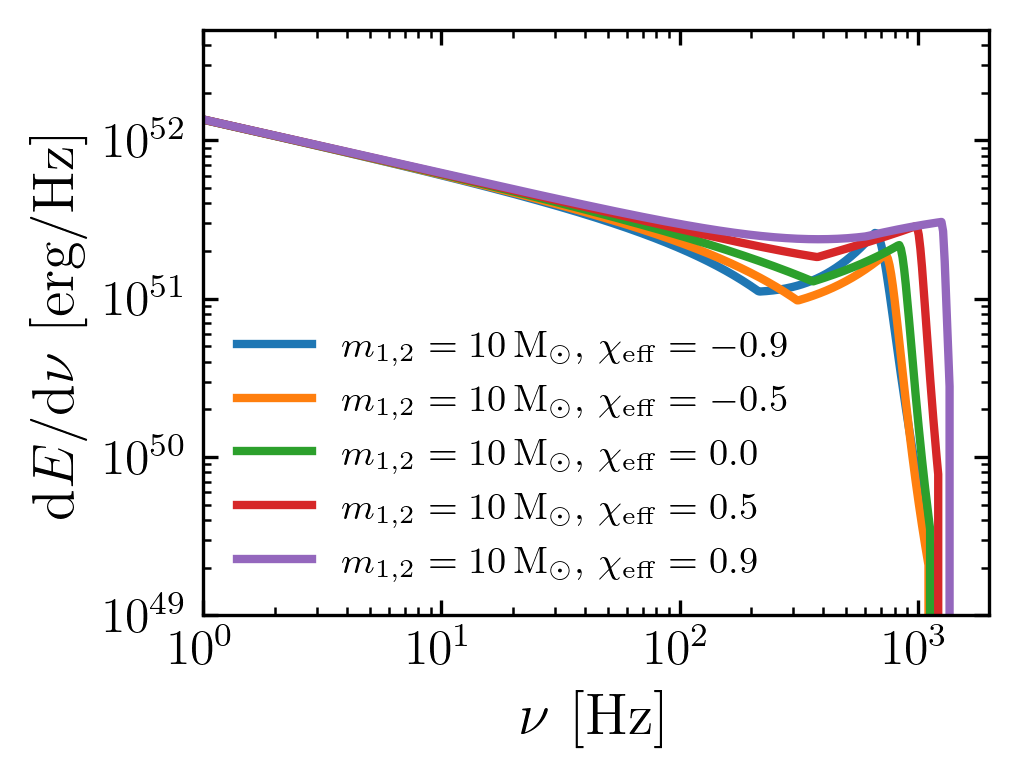

In [7]:
plt.figure()
f = np.logspace(0.,3.4, 500)
for i in range(df.shape[0]):
    dEdv = pop.GW_energy_spectrum(f, [i], waveforms='Ajith+11')
    plt.plot(f, dEdv, linewidth=2, label=r'$m_\mathrm{1,2}=%2.0f\,\mathrm{M}_\odot,\, \chi_\mathrm{eff}=%1.1f$'%(pop.getData('m_BH1',1),pop.getData('chi_eff',i)))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,2000)
plt.ylim(1e49,5e52)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc=3,fontsize=9)
plt.xlabel(r'$\nu$ [Hz]',fontsize=14)
plt.ylabel(r'$\mathrm{d}E/\mathrm{d}\nu$ [erg/Hz]',fontsize=14)
plt.savefig('./plots/arXiv_2109.05836_GW_energy_spectrum_2.pdf',dpi=300,bbox_inches='tight')

In [8]:
# CE and SMT model
SFR = 'Illustris'

# load BBHs from a hybrid POSYDON pop synth (CE/SMT cosmic+MESA) see arXiv:2106.15841
df_CE = pd.read_csv('./datasets/arXiv_2106.15841_CE_alpha_0.5.csv.gz', compression='gzip')
df_SMT = pd.read_csv('./datasets/arXiv_2106.15841_SMT.csv.gz', compression='gzip')

# CE channel
# match df.columns to class_variables
class_variables = ['totalMassEvolvedForZ', 'channel', 'optimistic', 'metallicity', 'm_BH1', 'm_star2_postCE', 'm_BH2',
                 'spin_BH1', 'spin_BH2', 'm_disk_rad', 'max_he_mass_ejected', 'p_postCE', 'p_f', 'e_f', 
                   'tilt_BH2', 'Dt_binary', 'Dt_inspiral']
pop_CE = CosmologicalWeight(df_CE, columns=df_CE.columns.tolist(), class_variables=class_variables, SFR=SFR)

sensitivity = 'infinite'
pop_CE.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_CE, z_formation_CE, z_merger_CE, s_i_CE = pop_CE.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_CE.getRedshiftBinCenter()
R_CE= pop_CE.RateDensity(s_i_CE, z_merger_CE, Type='BBHs', sensitivity='infinite')
print('CE: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_CE[0],2), 'Gpc^-3 yr^-1')

# SMT channnel
pop_SMT = CosmologicalWeight(df_SMT, columns=df_SMT.columns.tolist(), class_variables=class_variables, SFR=SFR)

sensitivity = 'infinite'
pop_SMT.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index_SMT, z_formation_SMT, z_merger_SMT, s_i_SMT = pop_SMT.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop_SMT.getRedshiftBinCenter()
R_SMT= pop_SMT.RateDensity(s_i_SMT, z_merger_SMT, Type='BBHs', sensitivity='infinite')
print('SMT: BBH merger rate density in the local Universe (z~%1.2f):'%z[0], round(R_SMT[0],2), 'Gpc^-3 yr^-1')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [02:43<00:00,  1.18s/it]


CE: BBH merger rate density in the local Universe (z~0.00): 11.21 Gpc^-3 yr^-1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [01:21<00:00,  1.69it/s]


SMT: BBH merger rate density in the local Universe (z~0.00): 22.14 Gpc^-3 yr^-1


In [9]:
# normalising factors resulting from Franciolini et al. (2022) arXiv:2105.03349 model selection see arXiv:2109.05836
O1O2O3_time = 166.6 + 183.3 #days
# intrinsic detection rate
n_to_one_over_yr = 365.25/O1O2O3_time
n_CE = 16729.39974388  # yr^-1 (including n_to_one_over_yr factor)
n_GC = 779.61294398    # yr^-1 (including n_to_one_over_yr factor)
n_SMT = 905.07610043 # yr^-1 (including n_to_one_over_yr factor)
n_all = 22072.40951953575 # yr^-1 from sum(R_BBH_all[1:]*dVdz_[:-1]), e.g. n_CE=sum(R_BBH_CE[1:]*dVdz_) 

# O3 detection rate
Ndet_CE = 10.35190231 # yr^-1 (including n_to_one_over_yr factor)
Ndet_GC = 15.72849709 # yr^-1 (including n_to_one_over_yr factor)
Ndet_SMT = 15.69943156 # yr^-1 (including n_to_one_over_yr factor)
Ndet_PBH = 4.150434830 # yr^-1 (including n_to_one_over_yr factor)
Ndet_all = Ndet_CE+Ndet_GC+Ndet_SMT+Ndet_PBH

Ndet_poisson_tot = (Ndet_CE+Ndet_GC+Ndet_SMT+Ndet_PBH)**(0.5) # yr^-1
n_poisson_tot = Ndet_poisson_tot*n_all/Ndet_all # poisson error around the underlying detection rate
R_BBHs_all_poisson_max = (n_all+n_poisson_tot)/n_all
R_BBHs_all_poisson_min = (n_all-n_poisson_tot)/n_all

df = pd.read_csv('./datasets/arXiv_2109.05836_GC_PBH.csv.gz', compression='gzip')
#data = np.loadtxt(path+'/data/Omega_GW_PBH.txt')
#nu_obs_PBH = data[:,0]
#Omega_GW_PBH_Ajith11 = data[:,1]

nu_obs = df['nu_obs']
n = len(nu_obs)
c = 2.99792458e10 # cm/s
rho_crit = 3*(66.7*1e5/1e6/3.086e+18)**2/(8*np.pi*6.67259e-8) # 8.356930283500733e-30 g/cm^3
Omega_GW = {'CE' : {'Ajith+11' : []},
            'SMT' : {'Ajith+11' : []},
            'GC' : {'Ajith+11' : df['GC']},
            'PBH' : {'Ajith+11' : df['PBH']},
            'nu_obs' : nu_obs}


for i in tqdm(range(n)):
    waveforms = 'Ajith+11'    
    F_nu = pop_CE.spectral_energy_density(s_i_CE/sum(s_i_CE)*n_CE, z_merger_CE, index_CE, nu_obs[i], waveforms=waveforms)
    Omega_GW['CE'][waveforms].append(F_nu*nu_obs[i]/(c**3*rho_crit))   
    F_nu = pop_SMT.spectral_energy_density(s_i_SMT/sum(s_i_SMT)*n_SMT, z_merger_SMT, index_SMT, nu_obs[i], waveforms=waveforms)
    Omega_GW['SMT'][waveforms].append(F_nu*nu_obs[i]/(c**3*rho_crit))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [16:03<00:00, 37.05s/it]


In [10]:
# power integrated sensitivity curves 
data = np.loadtxt('./datasets/schNell/Omega_GW_HLV_2yr.txt')
f_HLV_2yr = data[:,0]
Omega_HLV_2yr = data[:,1]
data = np.loadtxt('./datasets/schNell/Omega_GW_LISA_4yr.txt')
f_LISA_4yr = data[:,0]
Omega_LISA_4yr = data[:,1]
data = np.loadtxt('./datasets/schNell/Omega_GW_ET_2yr.txt')
f_ET_2yr = data[:,0]
Omega_ET_2yr = data[:,1]
data = np.loadtxt('./datasets/schNell/Omega_GW_HLVKa_2yr.txt')
f_HLVKa_2yr = data[:,0]
Omega_HLVKa_2yr = data[:,1]

# new LISA PSD, this mathches Fig. 11
# https://arxiv.org/pdf/2108.01167.pdf
data = np.loadtxt('./datasets/schNell/PI_LISA_New_4yr_SNR_20.dat')
nu_PI_LISA = data[:,0]
Omega_PI_LISA = data[:,1]/2 # timers 2 (rho) divided by 4 (yr)

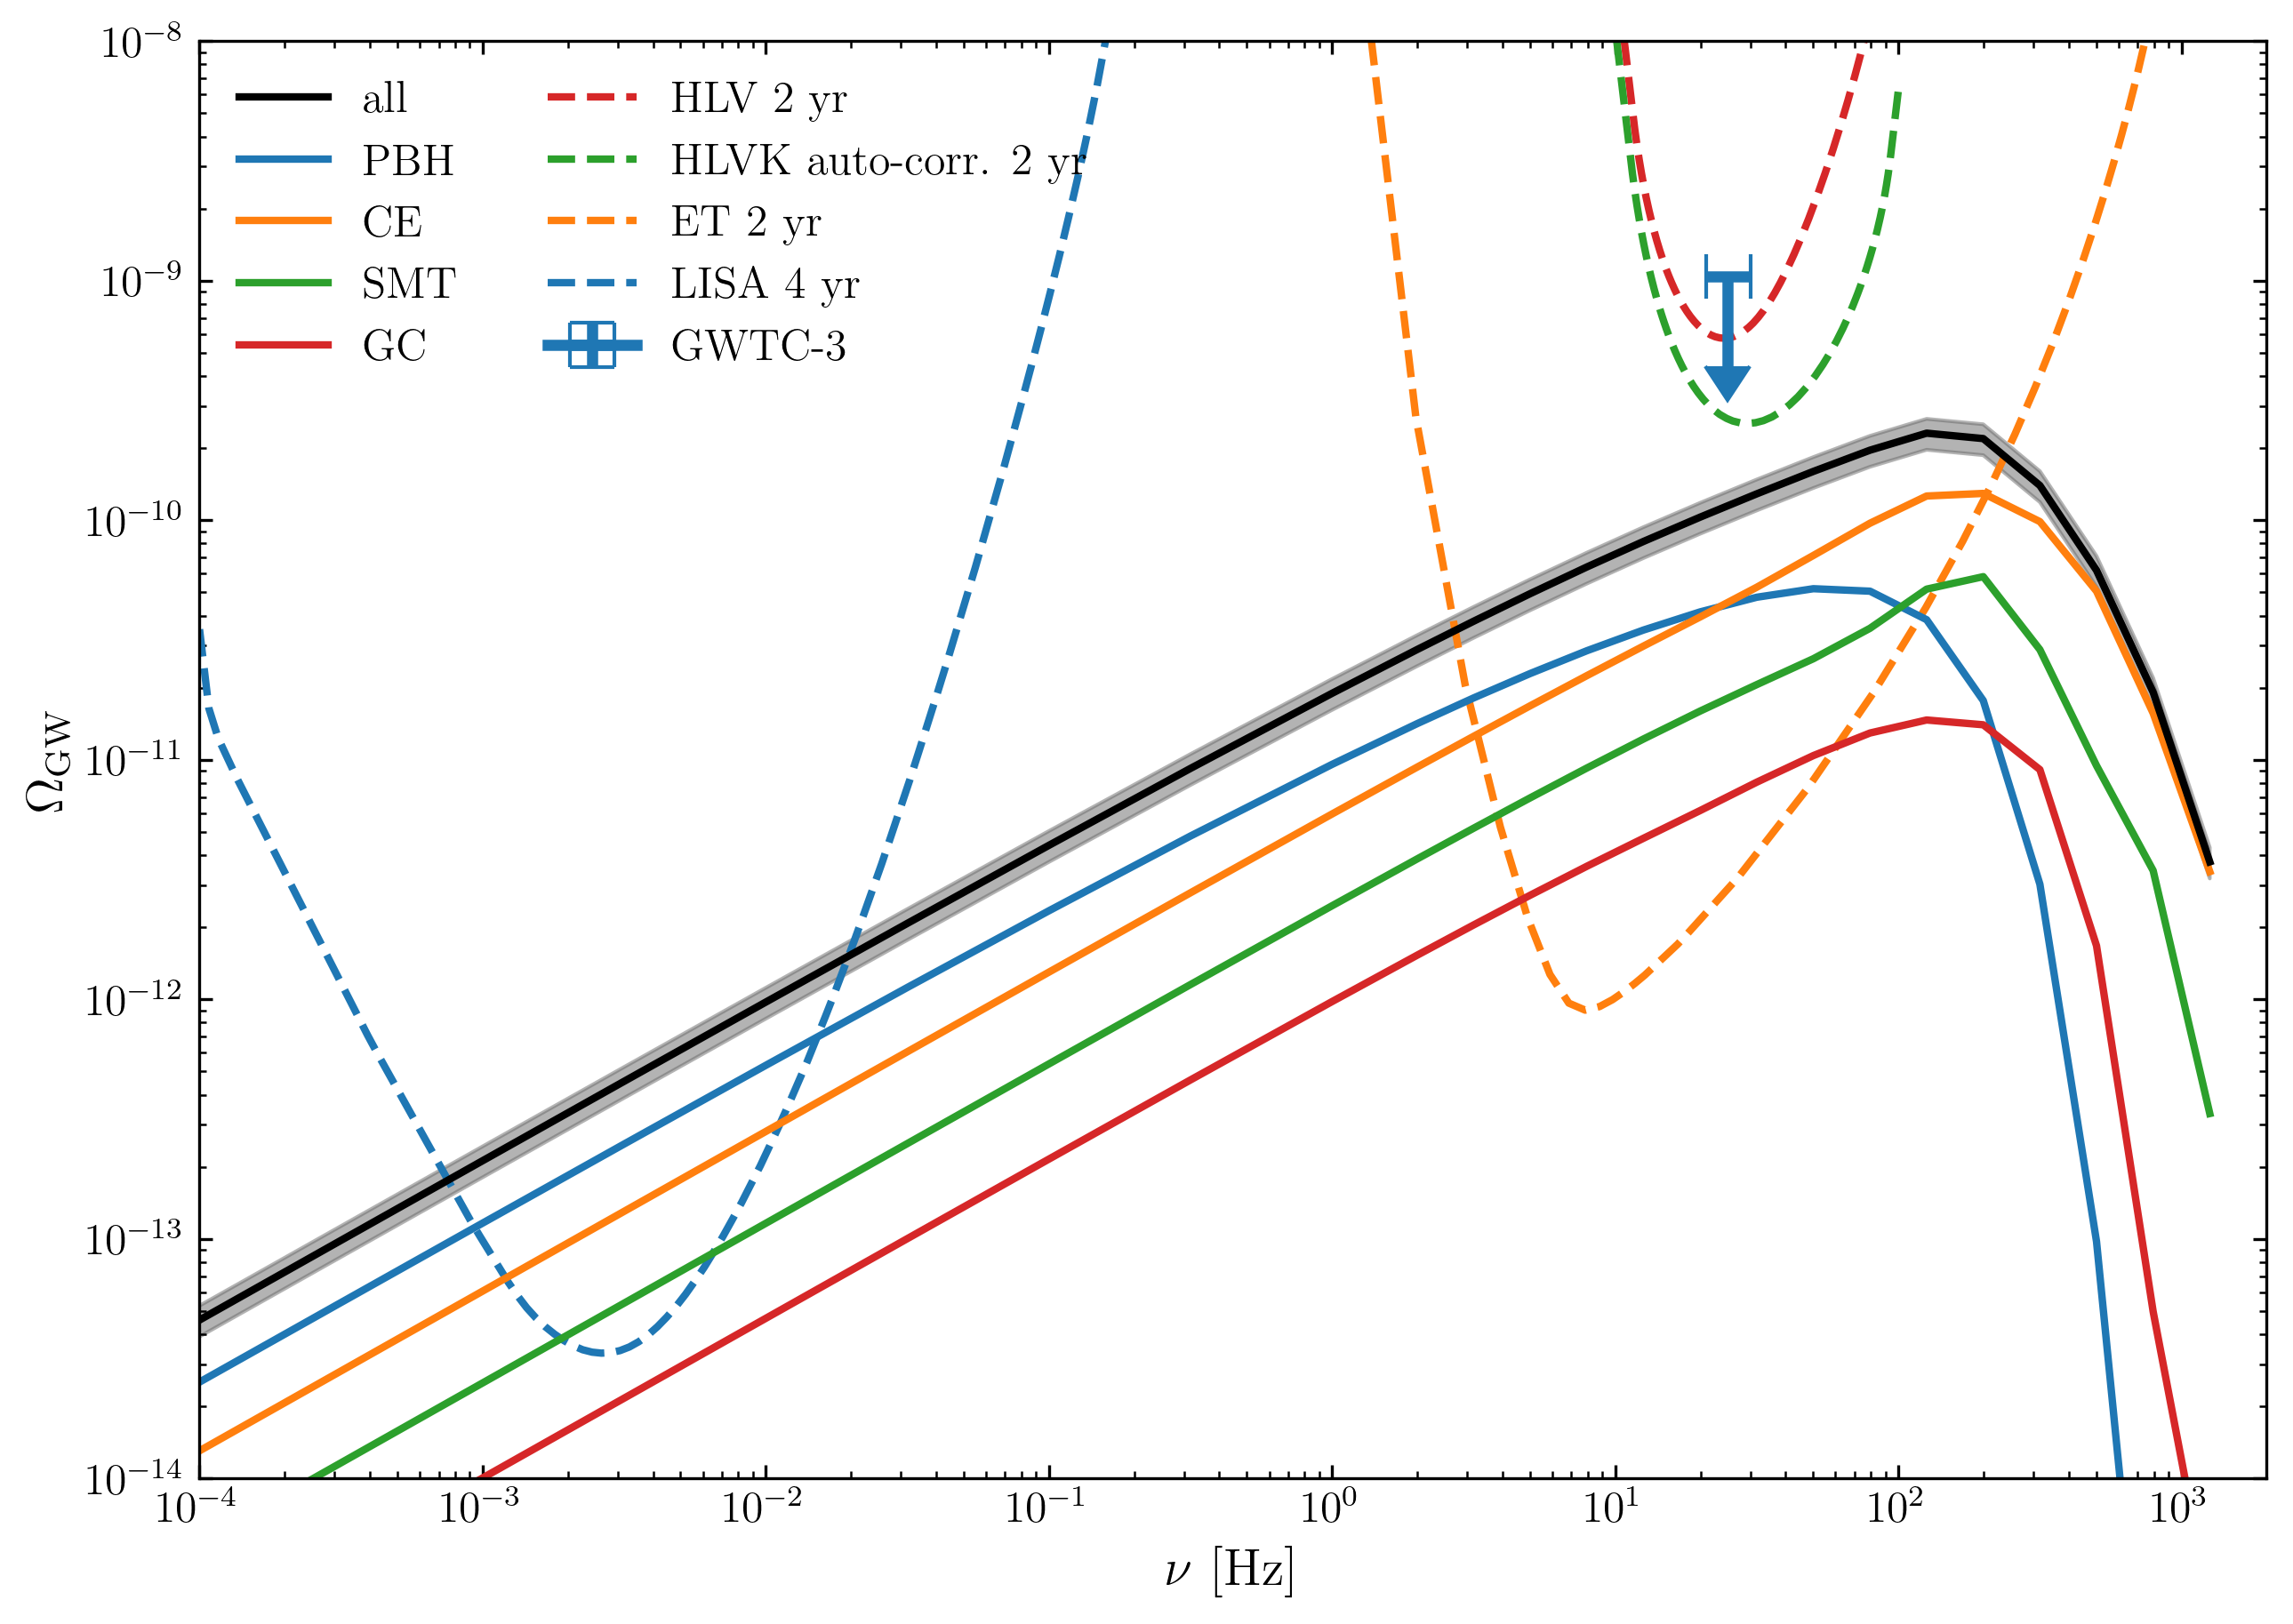

In [11]:

plt.figure(figsize=(10,7))
colors = ['tab:blue','tab:green','tab:orange','tab:red']

plt.plot(f_HLV_2yr, Omega_HLV_2yr, '--', c=colors[3], label='HLV 2 yr', linewidth=2)
plt.plot(f_HLVKa_2yr, Omega_HLVKa_2yr, '--', c=colors[1], label='HLVK auto-corr. 2 yr', linewidth=2)
plt.plot(f_ET_2yr, Omega_ET_2yr, '--', c=colors[2], label='ET 2 yr', linewidth=2)
plt.plot(nu_PI_LISA, Omega_PI_LISA, '--', c=colors[0], label='LISA 4 yr', linewidth=2)
plt.errorbar([25.], [1.04e-9], yerr=[[0.6e-9],[0.]], xerr=[[4],[5]], marker="_", linewidth=3, uplims=True, capsize=6, c=colors[0], 
             label=r'GWTC-3') #($\Omega_\mathrm{GW} \propto \nu^{2/3}$)

plt.plot(Omega_GW['nu_obs'], Omega_GW['PBH']['Ajith+11'], '-', c=colors[0], label='PBH', linewidth=2)
plt.plot(Omega_GW['nu_obs'],Omega_GW['CE']['Ajith+11'],'-',c=colors[2],label='CE', linewidth=2)
plt.plot(Omega_GW['nu_obs'],Omega_GW['SMT']['Ajith+11'],'-',c=colors[1],label='SMT', linewidth=2)
plt.plot(Omega_GW['nu_obs'],Omega_GW['GC']['Ajith+11'],'-',c=colors[3],label='GC', linewidth=2)

plt.fill_between(Omega_GW['nu_obs'], R_BBHs_all_poisson_max*(np.array(Omega_GW['CE']['Ajith+11'])+
                            np.array(Omega_GW['SMT']['Ajith+11'])+
                            np.array(Omega_GW['GC']['Ajith+11'])+
                            np.array(Omega_GW['PBH']['Ajith+11'])), 
                 R_BBHs_all_poisson_min*(np.array(Omega_GW['CE']['Ajith+11'])+
                            np.array(Omega_GW['SMT']['Ajith+11'])+
                            np.array(Omega_GW['GC']['Ajith+11'])+
                            np.array(Omega_GW['PBH']['Ajith+11'])),
                 color='dimgrey', alpha=0.5)

plt.plot(Omega_GW['nu_obs'],np.array(Omega_GW['CE']['Ajith+11'])+
                            np.array(Omega_GW['SMT']['Ajith+11'])+
                            np.array(Omega_GW['GC']['Ajith+11'])+
                            np.array(Omega_GW['PBH']['Ajith+11']),
         '-',c='black',label='all', linewidth=2)

handles, labels = plt.gca().get_legend_handles_labels()
order = [8,4,5,6,7,0,1,2,3,9]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2, ncol=2,fontsize=12)

plt.xlabel(r'$\nu$ [Hz]',fontsize=14)
plt.ylabel(r'$\Omega_\mathrm{GW}$',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-14,1e-8)
plt.xlim(1e-4,2e3)
plt.savefig('./plots/arXiv_2109.05836_SGWB.pdf',dpi=300,bbox_inches='tight')